In [168]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path="data/Mouse_metadata.csv"
study_results_path="data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata=pd.read_csv(mouse_metadata_path)
study_results=pd.read_csv(study_results_path)

merged_df=pd.merge(mouse_metadata, study_results, on="Mouse ID")
merged_df.head()


# Display the data table for preview
merged_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [169]:
# Checking the number of mice.
unique_mice=merged_df["Mouse ID"].unique()
num_mice=len(unique_mice)
print("The number of unique mice is:",num_mice)


The number of unique mice is: 249


In [170]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mice_timepoints=merged_df[merged_df.duplicated(subset=["Mouse ID","Timepoint"],keep=False)]
duplicate_mice_timepoints


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [171]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mouse_ids_to_remove=duplicate_mice_timepoints["Mouse ID"].unique()
cleaned_data=merged_df[~merged_df["Mouse ID"].isin(mouse_ids_to_remove)]
cleaned_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [172]:
# Checking the number of mice in the clean DataFrame.

unique_mice=cleaned_data["Mouse ID"].unique()
num_mice_clean=len(unique_mice)
print("The number of unique mice is:", num_mice_clean)

The number of unique mice is: 248


In [173]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line


grouped=cleaned_data.groupby("Drug Regimen")
summary_stats=grouped["Tumor Volume (mm3)"].agg(["mean","median","var","std"])
sem_values=grouped["Tumor Volume (mm3)"].apply(sem)
summary_stats["SEM"]=sem_values

summary_stats = summary_stats.rename(columns={
    "mean":"Mean",
    "median":"Median",
    "var":"Variance",
    "std":"Std Deviation",
})

summary_stats

,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


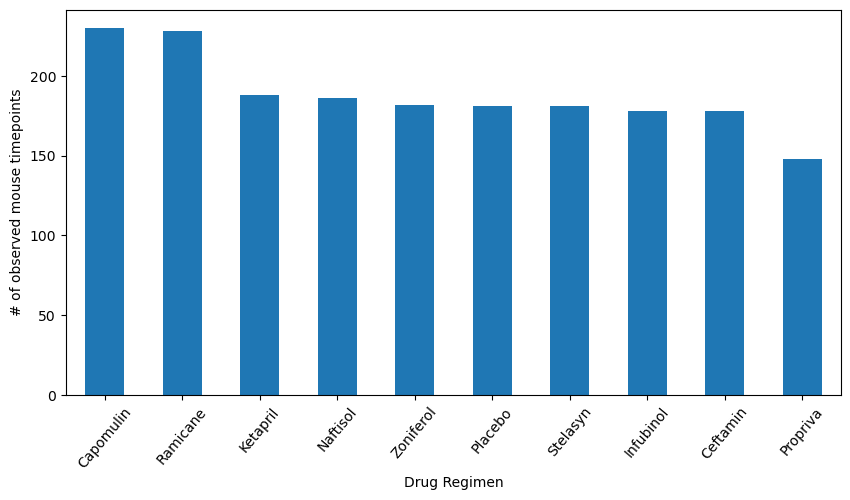

In [174]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts=cleaned_data["Drug Regimen"].value_counts()
regimen_counts.plot(kind="bar",figsize=(10, 5))
plt.xlabel("Drug Regimen")
plt.ylabel("# of observed mouse timepoints")
plt.xticks(rotation=50)

plt.show()

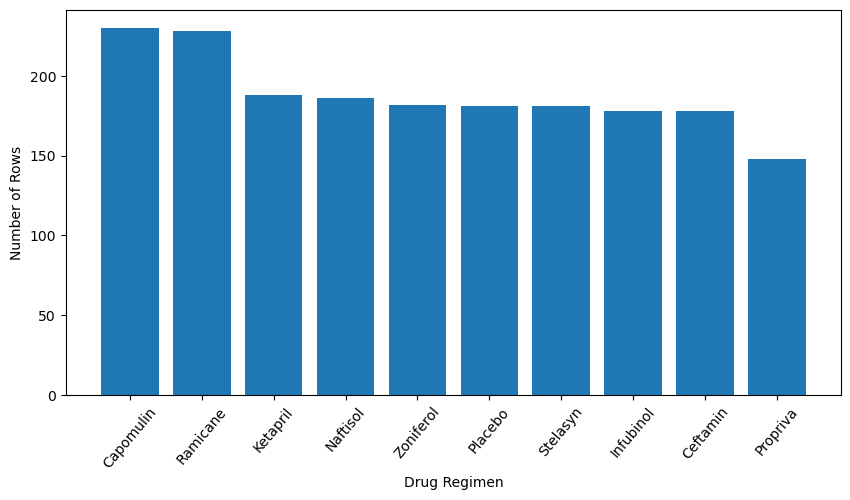

In [175]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

regimen_counts=cleaned_data["Drug Regimen"].value_counts()
plt.figure(figsize=(10,5))
plt.bar(regimen_counts.index, regimen_counts.values)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows")
plt.xticks(rotation=50)

plt.show()

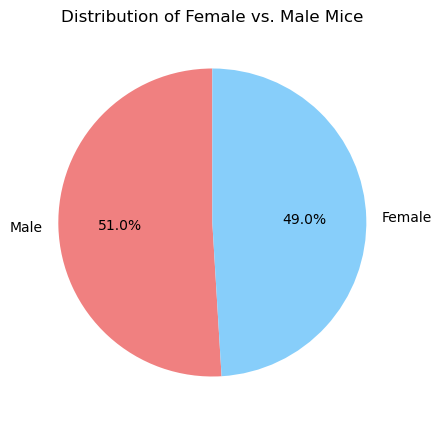

In [176]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_counts=cleaned_data["Sex"].value_counts()
gender_counts.plot(kind="pie",autopct='%1.1f%%',startangle=90,figsize=(5,5),colors=["lightcoral","lightskyblue"])
plt.title("Distribution of Female vs. Male Mice")
plt.ylabel("")  # We do this in order tor emove the "Sex label"

plt.show()

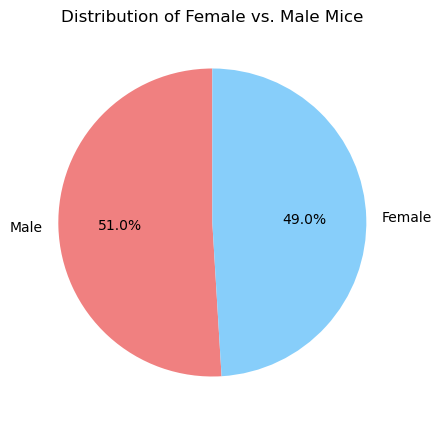

In [177]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_counts=cleaned_data["Sex"].value_counts()
labels=gender_counts.index
sizes=gender_counts.values
colors=["lightcoral","lightskyblue"]
plt.figure(figsize=(5,5))
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',startangle=90)
plt.title("Distribution of Female vs. Male Mice")

plt.show()

In [178]:
# Step 1: Create a grouped DataFrame with the last time point for each mouse
last_timepoint = cleaned_data.groupby('Mouse ID')['Timepoint'].max()

# Step 2: Merge the last_timepoint DataFrame with the original cleaned DataFrame
merged_data = pd.merge(cleaned_data, last_timepoint, on=['Mouse ID', 'Timepoint'])

# Step 3: Create lists to hold treatment names and final tumor volume data
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volumes = []

# Step 4: Loop through each treatment and append final tumor volumes to the list
for treatment in treatments:
    final_volume = merged_data.loc[merged_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    tumor_volumes.append(final_volume)

# Step 5: Calculate quartiles and IQR, and identify potential outliers
for i in range(len(treatments)):
    quartiles = tumor_volumes[i].quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    
    # Identify potential outliers
    outliers = tumor_volumes[i][(tumor_volumes[i] < lower_bound) | (tumor_volumes[i] > upper_bound)]
    
    print(f"Summary for {treatments[i]}:")
    print(f"Lower Quartile: {lower_q}")
    print(f"Upper Quartile: {upper_q}")
    print(f"IQR: {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    
    if outliers.empty:
        print("No potential outliers found.")
    else:
        print("Potential outliers:")
        print(outliers)

    print("\n")

Summary for Capomulin:
Lower Quartile: 32.37735684
Upper Quartile: 40.1592203
IQR: 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
No potential outliers found.


Summary for Ramicane:
Lower Quartile: 31.56046955
Upper Quartile: 40.65900627
IQR: 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
No potential outliers found.


Summary for Infubinol:
Lower Quartile: 54.04860769
Upper Quartile: 65.52574285
IQR: 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Potential outliers:
74    36.321346
Name: Tumor Volume (mm3), dtype: float64


Summary for Ceftamin:
Lower Quartile: 48.72207785
Upper Quartile: 64.29983003
IQR: 15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
No potential outliers found.




Text(0, 0.5, 'Final Tumor Volume (mm3)')

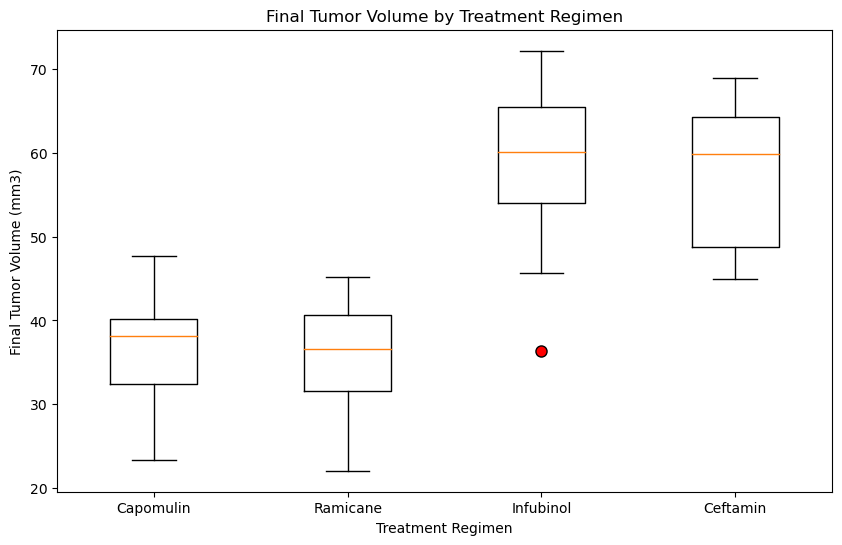

In [179]:
# Create a list of data for each treatment
data = [tumor_volumes[i] for i in range(len(treatments))]

# Create an outlier format dictionary
outlier_format = dict(marker='o', markersize=8, markerfacecolor='red', markeredgecolor='black')

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=treatments, flierprops=outlier_format)
plt.title('Final Tumor Volume by Treatment Regimen')
plt.xlabel('Treatment Regimen')
plt.ylabel('Final Tumor Volume (mm3)')


In [180]:
capomulin_mice=cleaned_data[cleaned_data["Drug Regimen"]=="Capomulin"]
mouse_ids_capomulin=capomulin_mice["Mouse ID"].unique()
print(mouse_ids_capomulin)

['s185' 'x401' 'm601' 'f966' 'u364' 'y793' 'r554' 'm957' 't565' 'i738'
 'w914' 'g288' 'l897' 'b742' 'b128' 'j246' 'j119' 'w150' 'v923' 'g316'
 's710' 'l509' 'r944' 'i557' 'r157']


In [181]:
capomulin_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


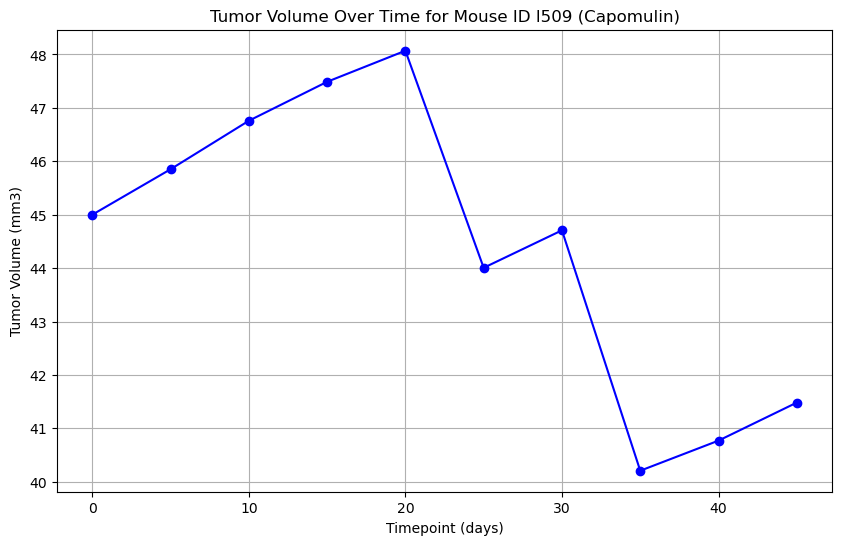

In [182]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# we selected the 'l509' mice
selected_mouse_id = "l509"  # Replace with the actual Mouse ID you want to select

# Step 2: Filter the DataFrame for the selected mouse and Capomulin treatment
capomulin_data = cleaned_data[(cleaned_data['Drug Regimen'] == 'Capomulin') & (cleaned_data['Mouse ID'] == selected_mouse_id)]

# Step 3: Create a line plot of tumor volume versus time point
plt.figure(figsize=(10, 6))
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], marker='o', linestyle='-', color='b')
plt.title(f'Tumor Volume Over Time for Mouse ID {selected_mouse_id} (Capomulin)')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)

plt.show()


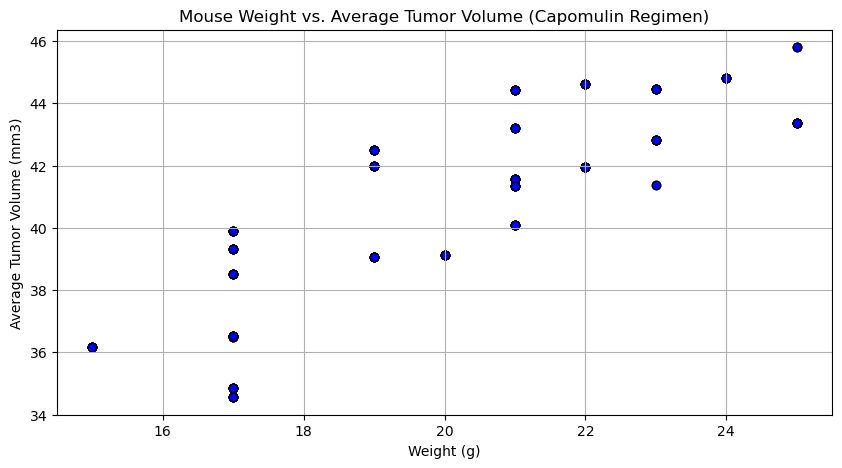

In [185]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Step 1: Group by 'Mouse ID' and calculate the average tumor volume
avg_tumor_volume = capomulin_mice.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
avg_tumor_volume_campomulin = avg_tumor_volume.merge(capomulin_mice[['Mouse ID', 'Weight (g)']], on='Mouse ID')

plt.figure(figsize=(10, 5))
plt.scatter(avg_tumor_volume_campomulin['Weight (g)'], avg_tumor_volume_campomulin['Tumor Volume (mm3)'], marker='o', facecolors='blue', edgecolors='black', alpha=0.75)
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid()
plt.show()


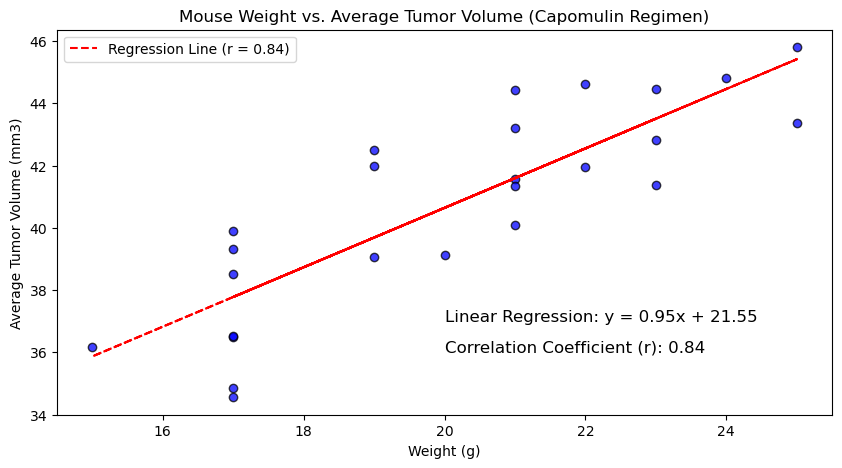

In [190]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
avg_tumor_volume_campomulin = capomulin_mice.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
# Extract weight as a NumPy array
weight = capomulin_mice.groupby('Mouse ID')['Weight (g)'].unique().str[0]

# Calculate the correlation coefficient
correlation = round(np.corrcoef(weight, avg_tumor_volume_campomulin)[0, 1], 2)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(weight, avg_tumor_volume_campomulin)

# Create a linear regression line (y = mx + b)
regression_line = slope * weight + intercept

# Create a scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(weight, avg_tumor_volume_campomulin, marker='o', facecolors='blue', edgecolors='black', alpha=0.75)
plt.plot(weight, regression_line, color='red', linestyle='--', label=f'Regression Line (r = {correlation})')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()

# Display the correlation coefficient and linear regression equation
plt.text(20, 36, f'Correlation Coefficient (r): {correlation}', fontsize=12, color='black')
plt.text(20, 37, f'Linear Regression: y = {slope:.2f}x + {intercept:.2f}', fontsize=12, color='black')

plt.show()